## Preparation

### Import

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import tensorflow as tf
import datetime # for tensorboard
from sklearn.model_selection import train_test_split
from tensorflow import keras

import pandas as pd
import seaborn as sns
from sklearn.manifold import TSNE
from keras import backend as K

import time

from tensorflow.keras.models import load_model

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" # display multiple outputs

from IPython.display import Image

from tensorflow.keras.callbacks import TensorBoard # Import TensorBoard

In [ ]:
!pip install tf-explain

     |████████████████████████████████| 43 kB 1.7 MB/s 


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# Load the TensorBoard notebook extension
%load_ext tensorboard

In [ ]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
# also want a validation set
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train,  
                                                    test_size = 0.2, random_state = 42)

In [ ]:
mnist; print();
x_train.shape; print();
x_val.shape; print();
x_test.shape; print();
y_train.shape; print();
y_val.shape; print();
y_test.shape

<module 'keras.api._v2.keras.datasets.mnist' from '/usr/local/lib/python3.7/dist-packages/keras/api/_v2/keras/datasets/mnist/__init__.py'>

(48000, 28, 28)

(12000, 28, 28)

(10000, 28, 28)

(48000,)

(12000,)

(10000,)

In [ ]:
tf.convert_to_tensor(x_train)

<tf.Tensor: shape=(48000, 28, 28), dtype=float64, numpy=
array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0

In [ ]:
tf.convert_to_tensor(y_train)

<tf.Tensor: shape=(48000,), dtype=uint8, numpy=array([5, 0, 1, ..., 0, 0, 4], dtype=uint8)>

In [ ]:
x_train_subset = x_train[0:5000,:,:]
x_train_subset_flat = x_train_subset.flatten().reshape(5000, 784)

y_train_subset = y_train[0:5000]

For this script only

In [ ]:
x_train1 = x_train.reshape(-1, 28,28, 1)
x_test1 = x_test.reshape(-1, 28,28, 1)
x_val1 = x_val.reshape(-1, 28,28, 1)

### Load models

In [ ]:
model_D8 = keras.models.load_model('/content/gdrive/MyDrive/Colab Notebooks/MNIST_with_Keras/MNIST_models/model_D8')
model_D128 = keras.models.load_model('/content/gdrive/MyDrive/Colab Notebooks/MNIST_with_Keras/MNIST_models/model_D128')
model_overfit = keras.models.load_model('/content/gdrive/MyDrive/Colab Notebooks/MNIST_with_Keras/MNIST_models/model_overfit')
model3 = keras.models.load_model('/content/gdrive/MyDrive/Colab Notebooks/MNIST_with_Keras/MNIST_models/model3')
model4 = keras.models.load_model('/content/gdrive/MyDrive/Colab Notebooks/MNIST_with_Keras/MNIST_models/model4')
model5 = keras.models.load_model('/content/gdrive/MyDrive/Colab Notebooks/MNIST_with_Keras/MNIST_models/model5')
model5a = keras.models.load_model('/content/gdrive/MyDrive/Colab Notebooks/MNIST_with_Keras/MNIST_models/model5a')
model5b = keras.models.load_model('/content/gdrive/MyDrive/Colab Notebooks/MNIST_with_Keras/MNIST_models/model5b')
model5c = keras.models.load_model('/content/gdrive/MyDrive/Colab Notebooks/MNIST_with_Keras/MNIST_models/model5c')
model6 = keras.models.load_model('/content/gdrive/MyDrive/Colab Notebooks/MNIST_with_Keras/MNIST_models/model6')
model7 = keras.models.load_model('/content/gdrive/MyDrive/Colab Notebooks/MNIST_with_Keras/MNIST_models/model7')

## Visualisations

### Neural network Activation Visualisation with tf-explain

https://www.machinecurve.com/index.php/2020/04/27/neural-network-activation-visualization-with-tf-explain/

Activation Visualisation for neural network interpretability with tf-explain and Keras. 

The tf-explain framework, Created by Sicara, is a collection of “Interpretability Methods for tf.keras models with Tensorflow 2.0”. 

Visualizing the activations during training for model 5 (conv layer with 64 filters)...
See code for model5 where I installed tf-explain, imported it and set it up as a callback. 

The following shows the Activation Visualizations generated during training. Activation visualisation visualises how a given input comes out of a specific activation layer and what each subsequent feature map looks like. 

**Need to specify layer name.** 

In [ ]:
from tf_explain.callbacks.activations_visualization import ActivationsVisualizationCallback

In [ ]:
%tensorboard --logdir '/content/gdrive/MyDrive/Colab Notebooks/MNIST_with_Keras/MNIST_models/tfexplain_visualizations/model5a'

Visualizing the activations after training:

Looking at sample index 1. Have to reshape the data. Merge the data entry and its label into a tuple. 

In [ ]:
from tf_explain.core.activations import ExtractActivations

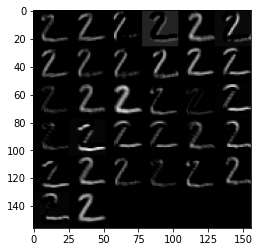

In [ ]:
# Define the Activation Visualization explainer
index = 1
image = x_test[index].reshape((1, 28, 28, 1))
label = y_test[index]
data = ([image], None) # don't seem to need label here
explainer = ExtractActivations()
explanation = explainer.explain(data, model5a, layers_name='vis_conv1')
plt.imshow(explanation, cmap='gray')

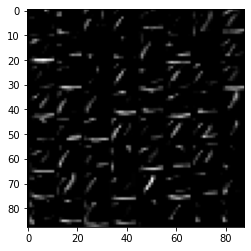

In [ ]:
# Define the Activation Visualization explainer
index = 1
image = x_test[index].reshape((1, 28, 28, 1))
label = y_test[index]
data = ([image], None) # don't seem to need label here
explainer = ExtractActivations()
explanation = explainer.explain(data, model5a, layers_name='vis_conv2')
plt.imshow(explanation, cmap='gray')

In [ ]:
# explainer.explain(data, model5a, layers_name='vis_conv1').shape # (156, 156)
# explainer.explain(data, model5a, layers_name='vis_conv2').shape # (88, 88)
explainer.explain(data, model5a, layers_name='vis_conv1')
explainer.explain(data, model5a, layers_name='vis_conv2')

array([[ 0,  0,  0, ..., 10, 10, 10],
       [ 0,  0,  0, ..., 10, 10, 10],
       [ 0,  0,  0, ..., 10, 10, 10],
       ...,
       [ 5,  5,  5, ...,  0,  0,  0],
       [ 5,  5,  5, ...,  0,  0,  0],
       [ 5,  5,  5, ...,  0,  0,  0]], dtype=uint8)

array([[  0,   0,   0, ...,  21,   0,   0],
       [  0,   0,   0, ...,  15,   0,   0],
       [  0,   0,   0, ...,   3,   0,   0],
       ...,
       [  0, 136, 106, ...,   0,   0,   0],
       [  0,  79, 122, ...,   0,   0,   0],
       [  0,   4,   5, ...,   0,   0,   0]], dtype=uint8)

### Visualising gradient importance with Vanilla Gradients and tf-explain

https://www.machinecurve.com/index.php/2020/05/02/visualizing-gradient-importance-with-vanilla-gradients-and-tf-explain/

**Vanilla Gradients:**

Visualize gradients importance on input image. Vanilla gradients can be used to determine which pixels of an image contribute most to the outcome. 

**Need to specify class.** 

https://github.com/sicara/tf-explain#vanilla-gradients



Further detail: 

https://medium.com/@thelastalias/saliency-maps-for-deep-learning-part-1-vanilla-gradient-1d0665de3284#:~:text=Vanilla%20Gradient%20is%20a%20saliency,debug%20and%20interpret%20your%20classifiers.

Vanilla Gradient algorithm:
1) forward pass with data
2) backward pass to input layer to get the gradient
3) render the gradient as a normalized heatmap

Backpropagation normally stops at the second layer during training for efficiency as you can’t change your input. Crucially, however, Vanilla Gradient continues to backprop to the input layer to see which pixels would affect our output the most. That is, to see which pixels are most salient. 

The backpropagation step here gives us good saliency clues because it calculates the gradient of the given output class with respect to the input image. 

Applying vanilla gradients during training

In [ ]:
from tf_explain.callbacks.vanilla_gradients import VanillaGradientsCallback

In [ ]:
%tensorboard --logdir '/content/gdrive/MyDrive/Colab Notebooks/MNIST_with_Keras/MNIST_models/tfexplain_visualizations/model5b'

Applying Vanilla Gradients to new data (after training)

First we will feed it an image corresponding to the correct class specified, to see which parts of the image contribute most to the output. This tells you something about whether the correct parts of the image contribute to the correct class output.

Second we will set a class to explain, and feed it an image corresponding to an incorrect class. The output image tells you something about what parts of the image (which is the wrong class) contribute to the output mostly, i.e. to the error mostly.

In [ ]:
from tf_explain.core.vanilla_gradients import VanillaGradients

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: Unsupported model architecture for VanillaGradients. The last two layers of the model should be: a layer which computes class scores with no activation, followed by an activation layer.
  import sys


Text(0.5, 1.0, 'Input')

Text(0.5, 1.0, 'Explanation')

Text(0.5, 1.0, 'Overlay')

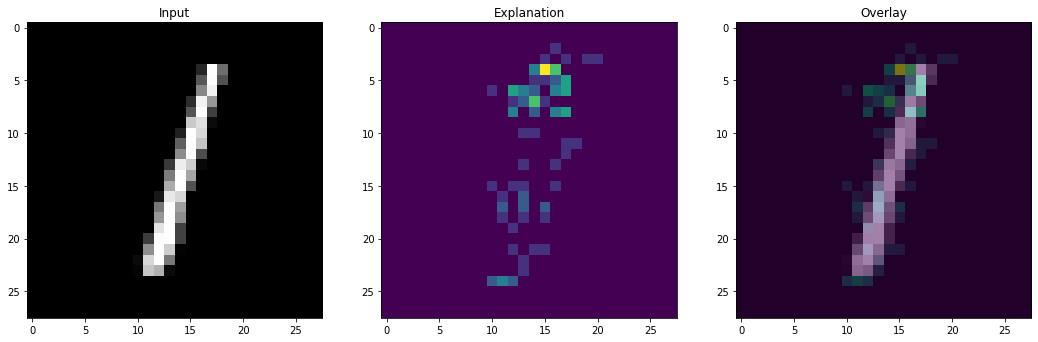

In [ ]:
sample = 2
sample_image = x_test[sample].reshape((1, 28, 28, 1)).reshape(28, 28)
label = y_test[sample]

explainer = VanillaGradients()
sample_array = (np.array([x_test.reshape(-1, 28, 28, 1)[sample]]), None) 
explanation = explainer.explain(sample_array, model5b, class_index=7) # 1 causes some sort of explosion??
# 4, 8 activated also

fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(18,6))

ax1.set_title('Input')
ax1.imshow(sample_image, cmap='gray')

ax2.set_title('Explanation')
ax2.imshow(explanation)

ax3.set_title('Overlay')
ax3.imshow(sample_image, cmap='gray')
ax3.imshow(explanation, alpha=0.5)

The first plot shows the sample you’re trying to explain your model with – and the second shows which parts of the sample contribute most to the class output.

Now for use case 2 – explaining the error. Suppose that we set class_index equal to some class in our explainer (say the number 4, as the MNIST dataset has 10 classes), and feed it a 9, we see:

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: Unsupported model architecture for VanillaGradients. The last two layers of the model should be: a layer which computes class scores with no activation, followed by an activation layer.
  import sys


Text(0.5, 1.0, 'Input')

Text(0.5, 1.0, 'Explanation')

Text(0.5, 1.0, 'Overlay')

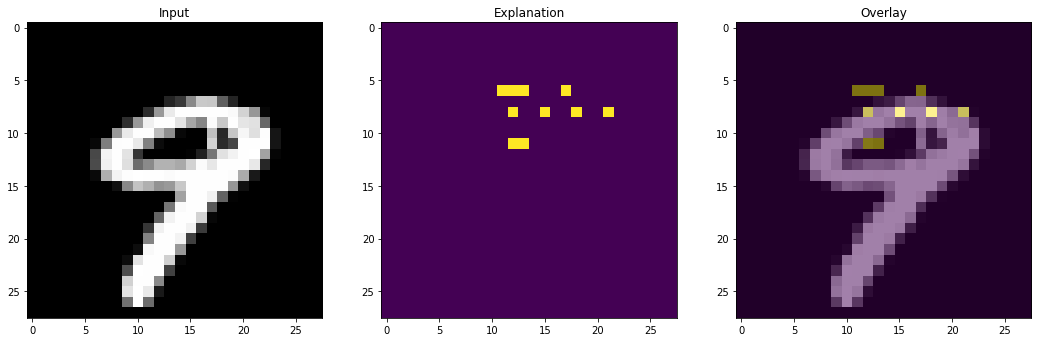

In [ ]:
sample = 9
sample_image = x_test[sample].reshape((1, 28, 28, 1)).reshape(28, 28)
label = y_test[sample]

explainer = VanillaGradients()
sample_array = (np.array([x_test.reshape(-1, 28, 28, 1)[sample]]), None)
explanation = explainer.explain(sample_array, model5b, class_index=4)
# 9 correctly actiaved also

fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(18,6))

ax1.set_title('Input')
ax1.imshow(sample_image, cmap='gray')

ax2.set_title('Explanation')
ax2.imshow(explanation)

ax3.set_title('Overlay')
ax3.imshow(sample_image, cmap='gray')
ax3.imshow(explanation, alpha=0.5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: Unsupported model architecture for VanillaGradients. The last two layers of the model should be: a layer which computes class scores with no activation, followed by an activation layer.
  import sys


Text(0.5, 1.0, 'Input')

Text(0.5, 1.0, 'Explanation')

Text(0.5, 1.0, 'Overlay')

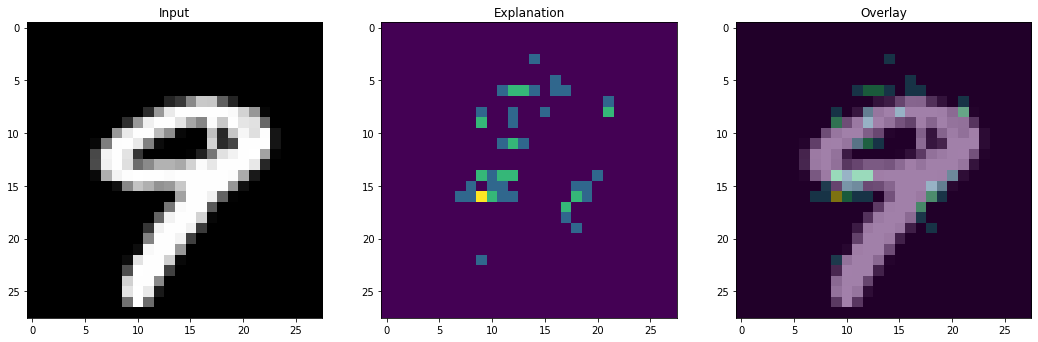

In [ ]:
sample = 9
sample_image = x_test[sample].reshape((1, 28, 28, 1)).reshape(28, 28)
label = y_test[sample]

explainer = VanillaGradients()
sample_array = (np.array([x_test.reshape(-1, 28, 28, 1)[sample]]), None)
explanation = explainer.explain(sample_array, model5b, class_index=9)
# 9 correctly actiaved also

fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(18,6))

ax1.set_title('Input')
ax1.imshow(sample_image, cmap='gray')

ax2.set_title('Explanation')
ax2.imshow(explanation)

ax3.set_title('Overlay')
ax3.imshow(sample_image, cmap='gray')
ax3.imshow(explanation, alpha=0.5)

It seems that the distinction is not so strong. Nevertheless, you can still use Vanilla Gradients to determine which parts of the input contribute to the output the most.

##### Other examples

Here feeding a 4, activates nothing for class 4...

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: UserWarning: Unsupported model architecture for VanillaGradients. The last two layers of the model should be: a layer which computes class scores with no activation, followed by an activation layer.
  if sys.path[0] == '':


Text(0.5, 1.0, 'Input')

Text(0.5, 1.0, 'Explanation')

Text(0.5, 1.0, 'Overlay')

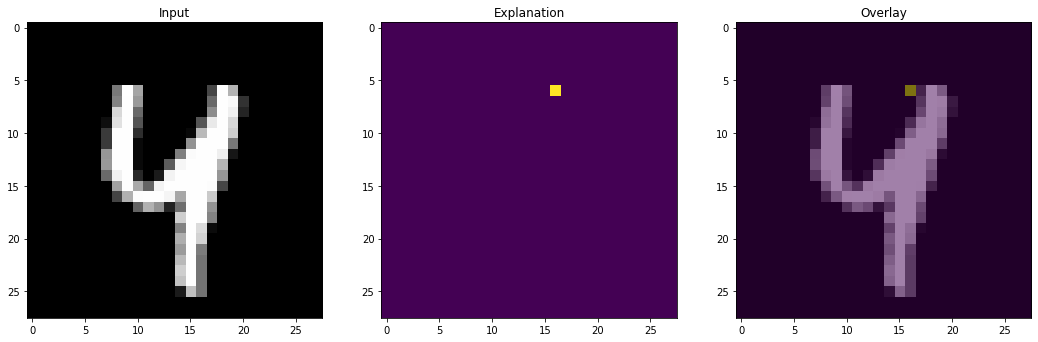

In [ ]:
# sample = 4 
# sample = 19
# sample = 24
# sample = 27
# sample = 33 ## what??
sample = 42
sample_image = x_test[sample].reshape((1, 28, 28, 1)).reshape(28, 28)
label = y_test[sample]

explainer = VanillaGradients()
sample_array = (np.array([x_test.reshape(-1, 28, 28, 1)[sample]]), None)
explanation = explainer.explain(sample_array, model5b, class_index=4)
# 9 activated the same

fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(18,6))

ax1.set_title('Input')
ax1.imshow(sample_image, cmap='gray')

ax2.set_title('Explanation')
ax2.imshow(explanation)

ax3.set_title('Overlay')
ax3.imshow(sample_image, cmap='gray')
ax3.imshow(explanation, alpha=0.5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: Unsupported model architecture for VanillaGradients. The last two layers of the model should be: a layer which computes class scores with no activation, followed by an activation layer.
  import sys


Text(0.5, 1.0, 'Input')

Text(0.5, 1.0, 'Explanation')

Text(0.5, 1.0, 'Overlay')

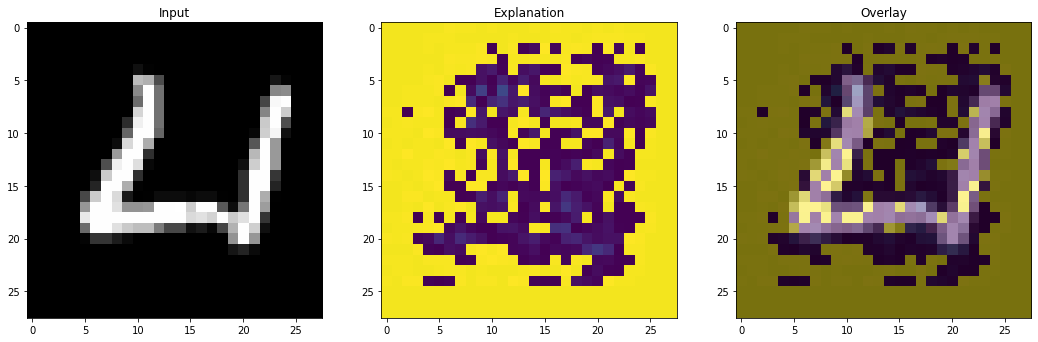

In [ ]:
sample = 33 ## what??
sample_image = x_test[sample].reshape((1, 28, 28, 1)).reshape(28, 28)
label = y_test[sample]

explainer = VanillaGradients()
sample_array = (np.array([x_test.reshape(-1, 28, 28, 1)[sample]]), None)
explanation = explainer.explain(sample_array, model5b, class_index=4) # no idea why this happens - exploding gradient?

fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(18,6))

ax1.set_title('Input')
ax1.imshow(sample_image, cmap='gray')

ax2.set_title('Explanation')
ax2.imshow(explanation)

ax3.set_title('Overlay')
ax3.imshow(sample_image, cmap='gray')
ax3.imshow(explanation, alpha=0.5)

Here is an unusual number 6 (I think?)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: Unsupported model architecture for VanillaGradients. The last two layers of the model should be: a layer which computes class scores with no activation, followed by an activation layer.
  import sys


Text(0.5, 1.0, 'Input')

Text(0.5, 1.0, 'Explanation')

Text(0.5, 1.0, 'Overlay')

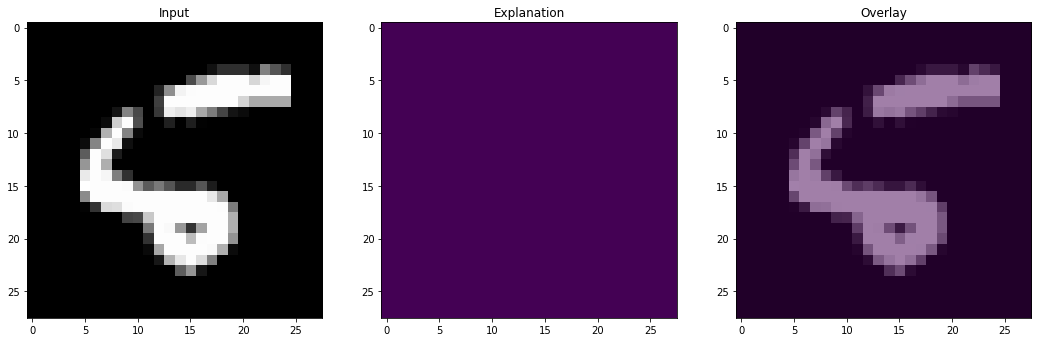

In [ ]:
sample = 8
sample_image = x_test[sample].reshape((1, 28, 28, 1)).reshape(28, 28)
label = y_test[sample]

explainer = VanillaGradients()
sample_array = (np.array([x_test.reshape(-1, 28, 28, 1)[sample]]), None)
explanation = explainer.explain(sample_array, model5b, class_index=6)

fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(18,6))

ax1.set_title('Input')
ax1.imshow(sample_image, cmap='gray')

ax2.set_title('Explanation')
ax2.imshow(explanation)

ax3.set_title('Overlay')
ax3.imshow(sample_image, cmap='gray')
ax3.imshow(explanation, alpha=0.5)

This method seems to depend on the model training run, and also the exploding gradients seem to depend on model run. 

### Grad CAM (Gradient weighted Class Activation Maps) with tf-explain


https://www.machinecurve.com/index.php/2019/11/28/visualizing-keras-cnn-attention-grad-cam-class-activation-maps/ 

Visualize how parts of the image affects neural network's output by looking into the activation maps

It uses the gradients of any target concept, flowing into the final convolutional layer to produce a coarse localization map highlighting important regions in the image for predicting the concept. https://arxiv.org/abs/1610.02391ddddada

They generate heatmaps at the convolutional level rather than the dense neural layer level, taking into account more spatial details.
Saliency Maps, which – given some input image – tell you something about the importance of each pixel for generating the class decision, hence visualizing where the model looks at when deciding. This is achieved by mathematically asking the following question: how does the output of the saliency map change when changing its input? However, we can find suggestions for improvement with respect to saliency maps as they highlight many details in the image, but are not necessarily class discriminative. Class activation maps (or CAMs) solve this problem: they are highly class discriminative, exclusively highlighting the class regions for the class to be visualized. Traditional CAMs can only be used by a small class of ConvNets, i.e. those without densely-connected layers, directly passing forward the convolutional feature maps to the output layer. Grad-CAMs are a generalization of the CAM approach which can be used by any architecture, hence also the ones with densely-connected layers. 

**Need to specify layer name and class.** 

In [ ]:
from tf_explain.core.grad_cam import GradCAM

Text(0.5, 1.0, 'Input')

Text(0.5, 1.0, 'Explanation')

Text(0.5, 1.0, 'Overlay')

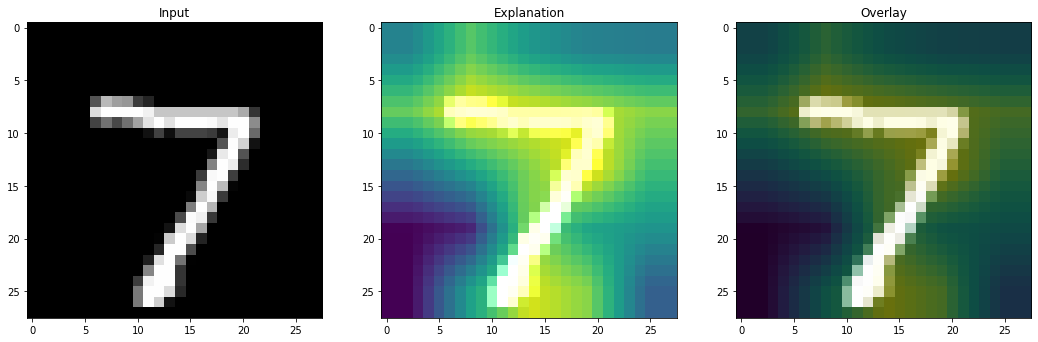

In [ ]:
sample = 0
sample_image = x_test[sample].reshape((1, 28, 28, 1)).reshape(28, 28)
label = y_test[sample]
# Instantiation of the explainer
explainer = GradCAM()
sample_array = (np.array([x_test.reshape(-1, 28, 28, 1)[sample]]), None)
# Call to explain() method
explanation = explainer.explain(sample_array, model=model5c, class_index=7)

fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(18,6))

ax1.set_title('Input')
ax1.imshow(sample_image, cmap='gray')

ax2.set_title('Explanation')
ax2.imshow(explanation)

ax3.set_title('Overlay')
ax3.imshow(sample_image, cmap='gray')
ax3.imshow(explanation, alpha=0.5)

Text(0.5, 1.0, 'Input')

Text(0.5, 1.0, 'Explanation')

Text(0.5, 1.0, 'Overlay')

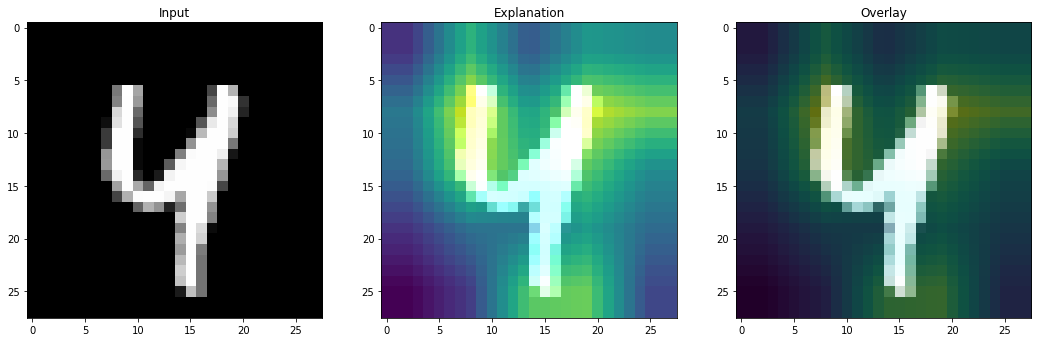

In [ ]:
sample = 42
sample_image = x_test[sample].reshape((1, 28, 28, 1)).reshape(28, 28)
label = y_test[sample]
# Instantiation of the explainer
explainer = GradCAM()
sample_array = (np.array([x_test.reshape(-1, 28, 28, 1)[sample]]), None)
# Call to explain() method
explanation = explainer.explain(sample_array, model=model5c, class_index=4)

fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(18,6))

ax1.set_title('Input')
ax1.imshow(sample_image, cmap='gray')

ax2.set_title('Explanation')
ax2.imshow(explanation)

ax3.set_title('Overlay')
ax3.imshow(sample_image, cmap='gray')
ax3.imshow(explanation, alpha=0.5)

Text(0.5, 1.0, '0')

Text(0.5, 1.0, '1')

Text(0.5, 1.0, '2')

Text(0.5, 1.0, '3')

Text(0.5, 1.0, '4')

Text(0.5, 1.0, '5')

Text(0.5, 1.0, '6')

Text(0.5, 1.0, '7')

Text(0.5, 1.0, '8')

Text(0.5, 1.0, '9')

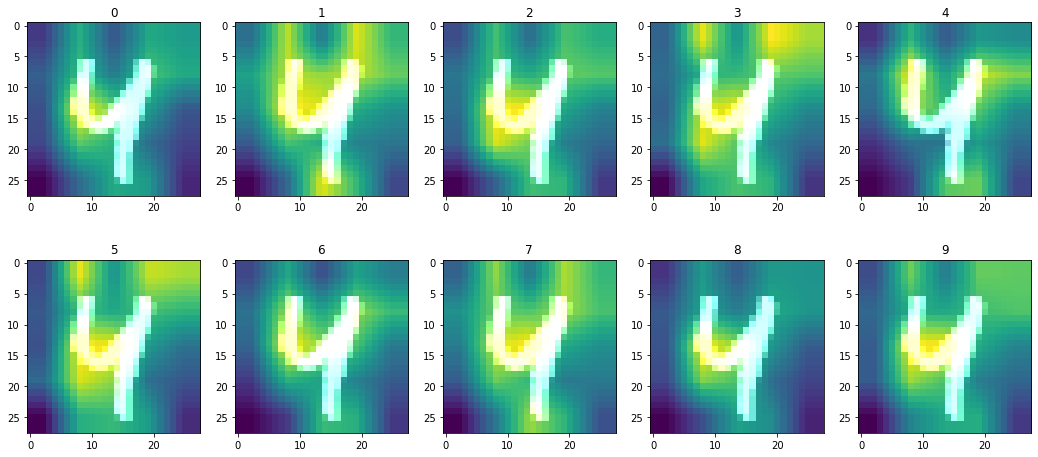

In [ ]:
explanation0 = explainer.explain(sample_array, model=model5c, class_index=0)
explanation1 = explainer.explain(sample_array, model=model5c, class_index=1)
explanation2 = explainer.explain(sample_array, model=model5c, class_index=2)
explanation3 = explainer.explain(sample_array, model=model5c, class_index=3)
explanation4 = explainer.explain(sample_array, model=model5c, class_index=4)
explanation5 = explainer.explain(sample_array, model=model5c, class_index=5)
explanation6 = explainer.explain(sample_array, model=model5c, class_index=6)
explanation7 = explainer.explain(sample_array, model=model5c, class_index=7)
explanation8 = explainer.explain(sample_array, model=model5c, class_index=8)
explanation9 = explainer.explain(sample_array, model=model5c, class_index=9)

fig, [[ax0, ax1, ax2, ax3, ax4], [ax5, ax6, ax7, ax8, ax9]] = plt.subplots(2,5, figsize = (18,8))

ax0.set_title('0')
ax0.imshow(explanation0)
ax1.set_title('1')
ax1.imshow(explanation1)
ax2.set_title('2')
ax2.imshow(explanation2)
ax3.set_title('3')
ax3.imshow(explanation3)
ax4.set_title('4')
ax4.imshow(explanation4)
ax5.set_title('5')
ax5.imshow(explanation5)
ax6.set_title('6')
ax6.imshow(explanation6)
ax7.set_title('7')
ax7.imshow(explanation7)
ax8.set_title('8')
ax8.imshow(explanation8)
ax9.set_title('9')
ax9.imshow(explanation9)

### Activation Maximization with TensorFlow 2 based Keras for visualising model inputs

https://www.machinecurve.com/index.php/2019/11/18/visualizing-keras-model-inputs-with-activation-maximization/

You visualize what a class in your trained model looks like by inverting the process of looking at what the model thinks is the best visual representation of class ‘4’ say.  You basically visualize what a class in your trained model looks like by inverting the process mentioned above. 
This time, the weights and the desired output are constant, and the input will be modified as long as neurons that yield the class are maximized. 
You’ll find what the model thinks it sees when you’re talking about some class.

In [ ]:
pip install tf-keras-vis

     |████████████████████████████████| 53 kB 1.6 MB/s 


In [ ]:
from tf_keras_vis.activation_maximization import ActivationMaximization

In [ ]:
def loss(output):
  return (output[0, 0], output[1, 1], output[2, 2], output[3, 3], output[4, 4], output[5, 5], output[6, 6], output[7, 7], output[8, 8], output[9, 9])

def model_modifier(m):
    m.layers[-1].activation = tf.keras.activations.linear

In [ ]:
visualize_activation = ActivationMaximization(model5, model_modifier)
seed_input = tf.random.uniform((10, 28, 28, 1), 0, 255)

Next, we prepare our visualization code, by performing two things:

Defining a loss function, which describes the outputs that must be used in the backwrds computation. Here, output[i, c] is used multiple times, where i represents the index of the output, and c the class index that must be visualized there. For example, in MNIST, your number 2 has class index 2.

Defining a model_modifier. This swaps the Softmax activation function in our trained model, which is common for multiclass classification problems, with the linear activation function. Why this is necessary can be seen in the images below. Since you’re essentially looking backwards, from outputs and fixed weights to inputs, you need a free path from outputs back to inputs. Softmax disturbs this free path by essentially transforming your model data in intricate ways, which makes the activation maximizations no longer understandable to humans.

Initializing ActivationMaximization with our model and the model_modifier which swaps Softmax for Linear.

Generating a random seed for each activation, to ensure that its initialization is not biased.

Generate the activations with visualize_activation and our self-defined loss function, the seed_input seeds and using 512 steps. The latter is recommended by tf-keras-vis docs for “generating good images”.

Finally, converting the activations into images, and visualizing them.

Text(0.5, 1.0, 'MNIST target = 0')

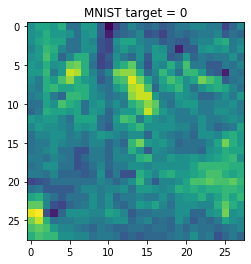

Text(0.5, 1.0, 'MNIST target = 1')

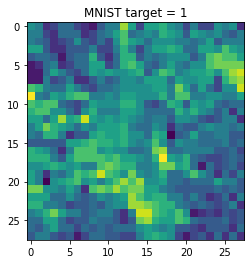

Text(0.5, 1.0, 'MNIST target = 2')

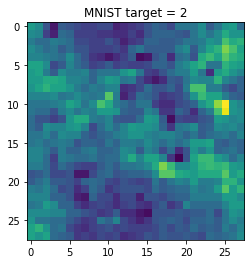

Text(0.5, 1.0, 'MNIST target = 3')

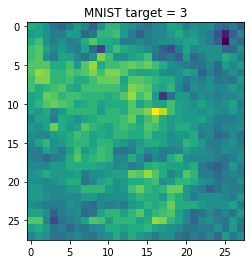

Text(0.5, 1.0, 'MNIST target = 4')

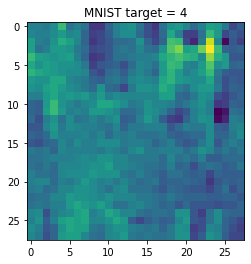

Text(0.5, 1.0, 'MNIST target = 5')

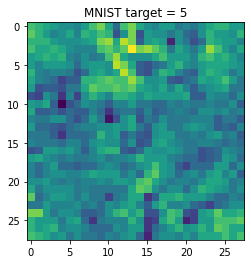

Text(0.5, 1.0, 'MNIST target = 6')

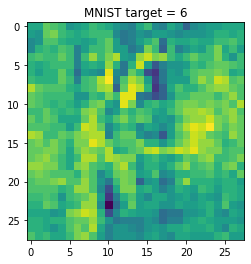

Text(0.5, 1.0, 'MNIST target = 7')

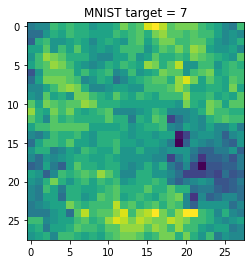

Text(0.5, 1.0, 'MNIST target = 8')

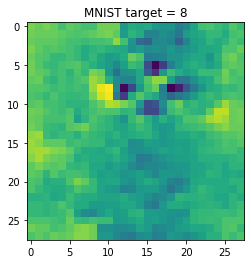

Text(0.5, 1.0, 'MNIST target = 9')

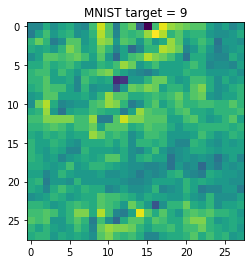

In [ ]:

# Generate activations and convert into images
activations = visualize_activation(loss, seed_input=seed_input, steps=512)
images = [activation.astype(np.float32) for activation in activations]

# Visualize each image
for i in range(0, len(images)):
  visualization = images[i].reshape(28,28)
  plt.imshow(visualization)
  plt.title(f'MNIST target = {i}')
  plt.show()

In [ ]:
# Initialize Activation Maximization
visualize_activation = ActivationMaximization(model5, model_modifier)

# Generate a random seed for each activation
seed_input = tf.random.uniform((10, 28, 28, 1), 0, 255)

In [ ]:
# Generate activations and convert into images
activations = visualize_activation(loss, seed_input=seed_input, steps=512)
images = [activation.astype(np.float32) for activation in activations]

In [ ]:
images[1].shape

(28, 28, 1)

Text(0.5, 1.0, 'MNIST target = 0')

Text(0.5, 1.0, 'MNIST target = 1')

Text(0.5, 1.0, 'MNIST target = 2')

Text(0.5, 1.0, 'MNIST target = 3')

Text(0.5, 1.0, 'MNIST target = 4')

Text(0.5, 1.0, 'MNIST target = 5')

Text(0.5, 1.0, 'MNIST target = 6')

Text(0.5, 1.0, 'MNIST target = 7')

Text(0.5, 1.0, 'MNIST target = 8')

Text(0.5, 1.0, 'MNIST target = 9')

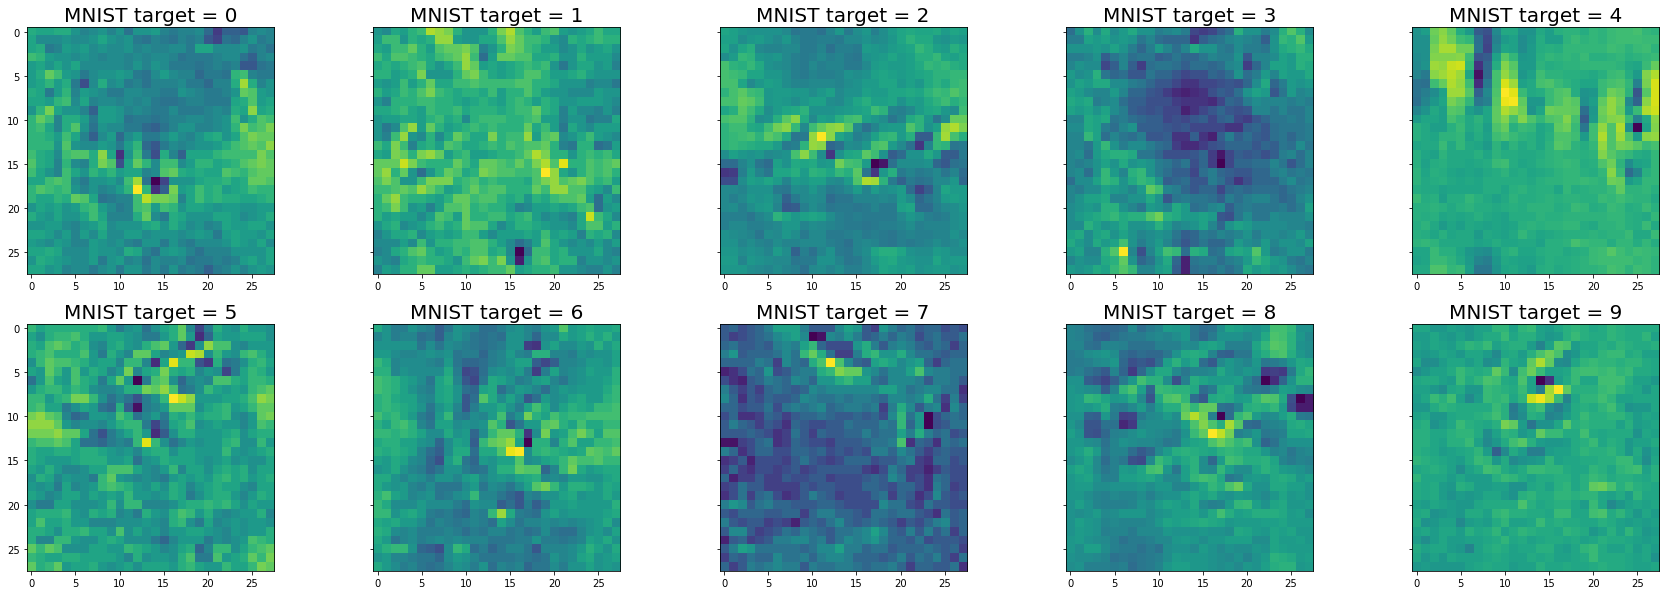

In [ ]:
f, axes = plt.subplots(2, 5, sharey=True,figsize=(30,10))
# Visualize each image
for i,ax in enumerate(axes.flat):
  visualization = images[i].reshape(28,28)
  ax.imshow(visualization)
  #ax.title.set_text(f'MNIST target = {i}')
  ax.set_title(f'MNIST target = {i}', fontsize=20)
  #ax.title(fontsize=20)